In [1]:
#!pip install ultralytics==8.0.20

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.20  Python-3.9.13 torch-2.1.0+cpu CPU
Setup complete  (12 CPUs, 15.7 GB RAM, 225.6/475.9 GB disk)


In [2]:
import os
HOME = os.getcwd()
print(HOME)

C:\Users\Jaseem Shaikh\Downloads\HappyAI project 1\Project


In [3]:
from ultralytics import YOLO

from IPython.display import display, Image

In [4]:
%cd {HOME}
!yolo task=detect mode=predict model=yolov8n.pt conf=0.25 source='https://media.roboflow.com/notebooks/examples/dog.jpeg'

C:\Users\Jaseem Shaikh\Downloads\HappyAI project 1\Project


Ultralytics YOLOv8.0.20  Python-3.9.13 torch-2.1.0+cpu CPU
YOLOv8n summary (fused): 168 layers, 3151904 parameters, 0 gradients, 8.7 GFLOPs
Found https://media.roboflow.com/notebooks/examples/dog.jpeg locally at dog.jpeg
image 1/1 C:\Users\Jaseem Shaikh\Downloads\HappyAI project 1\Project\dog.jpeg: 640x384 1 person, 1 car, 1 dog, 82.5ms
Speed: 0.0ms pre-process, 82.5ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


In [5]:
model = YOLO(f'{HOME}/yolov8n.pt')
results = model.predict(source='https://media.roboflow.com/notebooks/examples/dog.jpeg', conf=0.25)

Ultralytics YOLOv8.0.20  Python-3.9.13 torch-2.1.0+cpu CPU
YOLOv8n summary (fused): 168 layers, 3151904 parameters, 0 gradients, 8.7 GFLOPs
Found https://media.roboflow.com/notebooks/examples/dog.jpeg locally at dog.jpeg


In [6]:
results[0].boxes.xyxy

tensor([[   0.,  314.,  625., 1278.],
        [  55.,  250.,  648., 1266.],
        [ 633.,  720.,  701.,  786.]])

In [7]:
results[0].boxes.conf

tensor([0.72712, 0.29066, 0.28456])

In [8]:
results[0].boxes.cls

tensor([ 0., 16.,  2.])

## Augmentation for Custom Training

In [9]:
# importing required libraries
import albumentations as A
import os
from os import listdir
import imageio
import numpy as np

In [10]:
#Defing input and output location.  

input_path = r"C:\Users\Jaseem Shaikh\Downloads\HappyAI project 1\Project\images"

outputPath = r"C:\Users\Jaseem Shaikh\Downloads\HappyAI project 1\Project\output"

In [11]:
input_images = os.listdir(input_path)
input_images.sort()

def read_image(url):
    image = imageio.imread(url)
    return image

def augment_and_return(aug,image):
    aimg = aug(image=image)['image']
    return aimg

def save_augmented_image(aimg,image,directory):
    uri = directory + "/" + image
    imageio.imwrite(uri,aimg)
    
# Applying 4 augmentation on 150 images of people.

listagF = {'HorizontalFlip':'A.HorizontalFlip(p=0.5)',
          'BrightnessContrast':'A.RandomBrightnessContrast(p=0.2)',
          'Rotate':' A.Rotate(limit=40)',
          'Saturate':'A.HueSaturationValue(hue_shift_limit=20, sat_shift_limit=30, val_shift_limit=50, p=0.5)'}

keys = list(listagF.keys())
values = list(listagF.values())

for k in range(len(keys)):
    
    aug = eval(values[k])
    folder = keys[k]

    for i in input_images:
        path = input_path+'/'+str(i)
        image = read_image(path)
        
        aimg = augment_and_return(aug, image)
        
        dest = outputPath + folder + "/"
        if not os.path.exists(dest):
            os.mkdir(dest)
        
        save_augmented_image(aimg,i,outputPath)

C:\Users\Jaseem Shaikh\AppData\Local\Temp\ipykernel_10284\3117221858.py:5: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning dissapear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(url)


## Training custom model

In [12]:
!yolo task=detect mode=train model=yolov8s.pt data= data.yaml epochs=25 imgsz=224 plots=True

Ultralytics YOLOv8.0.20  Python-3.9.13 torch-2.1.0+cpu CPU
yolo\engine\trainer: task=detect, mode=train, model=yolov8s.yaml, data=data.yaml, epochs=25, patience=50, batch=16, imgsz=224, save=True, cache=False, device=, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=False, val=True, save_json=False, save_hybrid=False, conf=0.001, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=ultralytics/assets/, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False, int8=False, dynamic=False, simplify=False, opset=17, workspace=4, nms=False, lr0=0.01, lrf

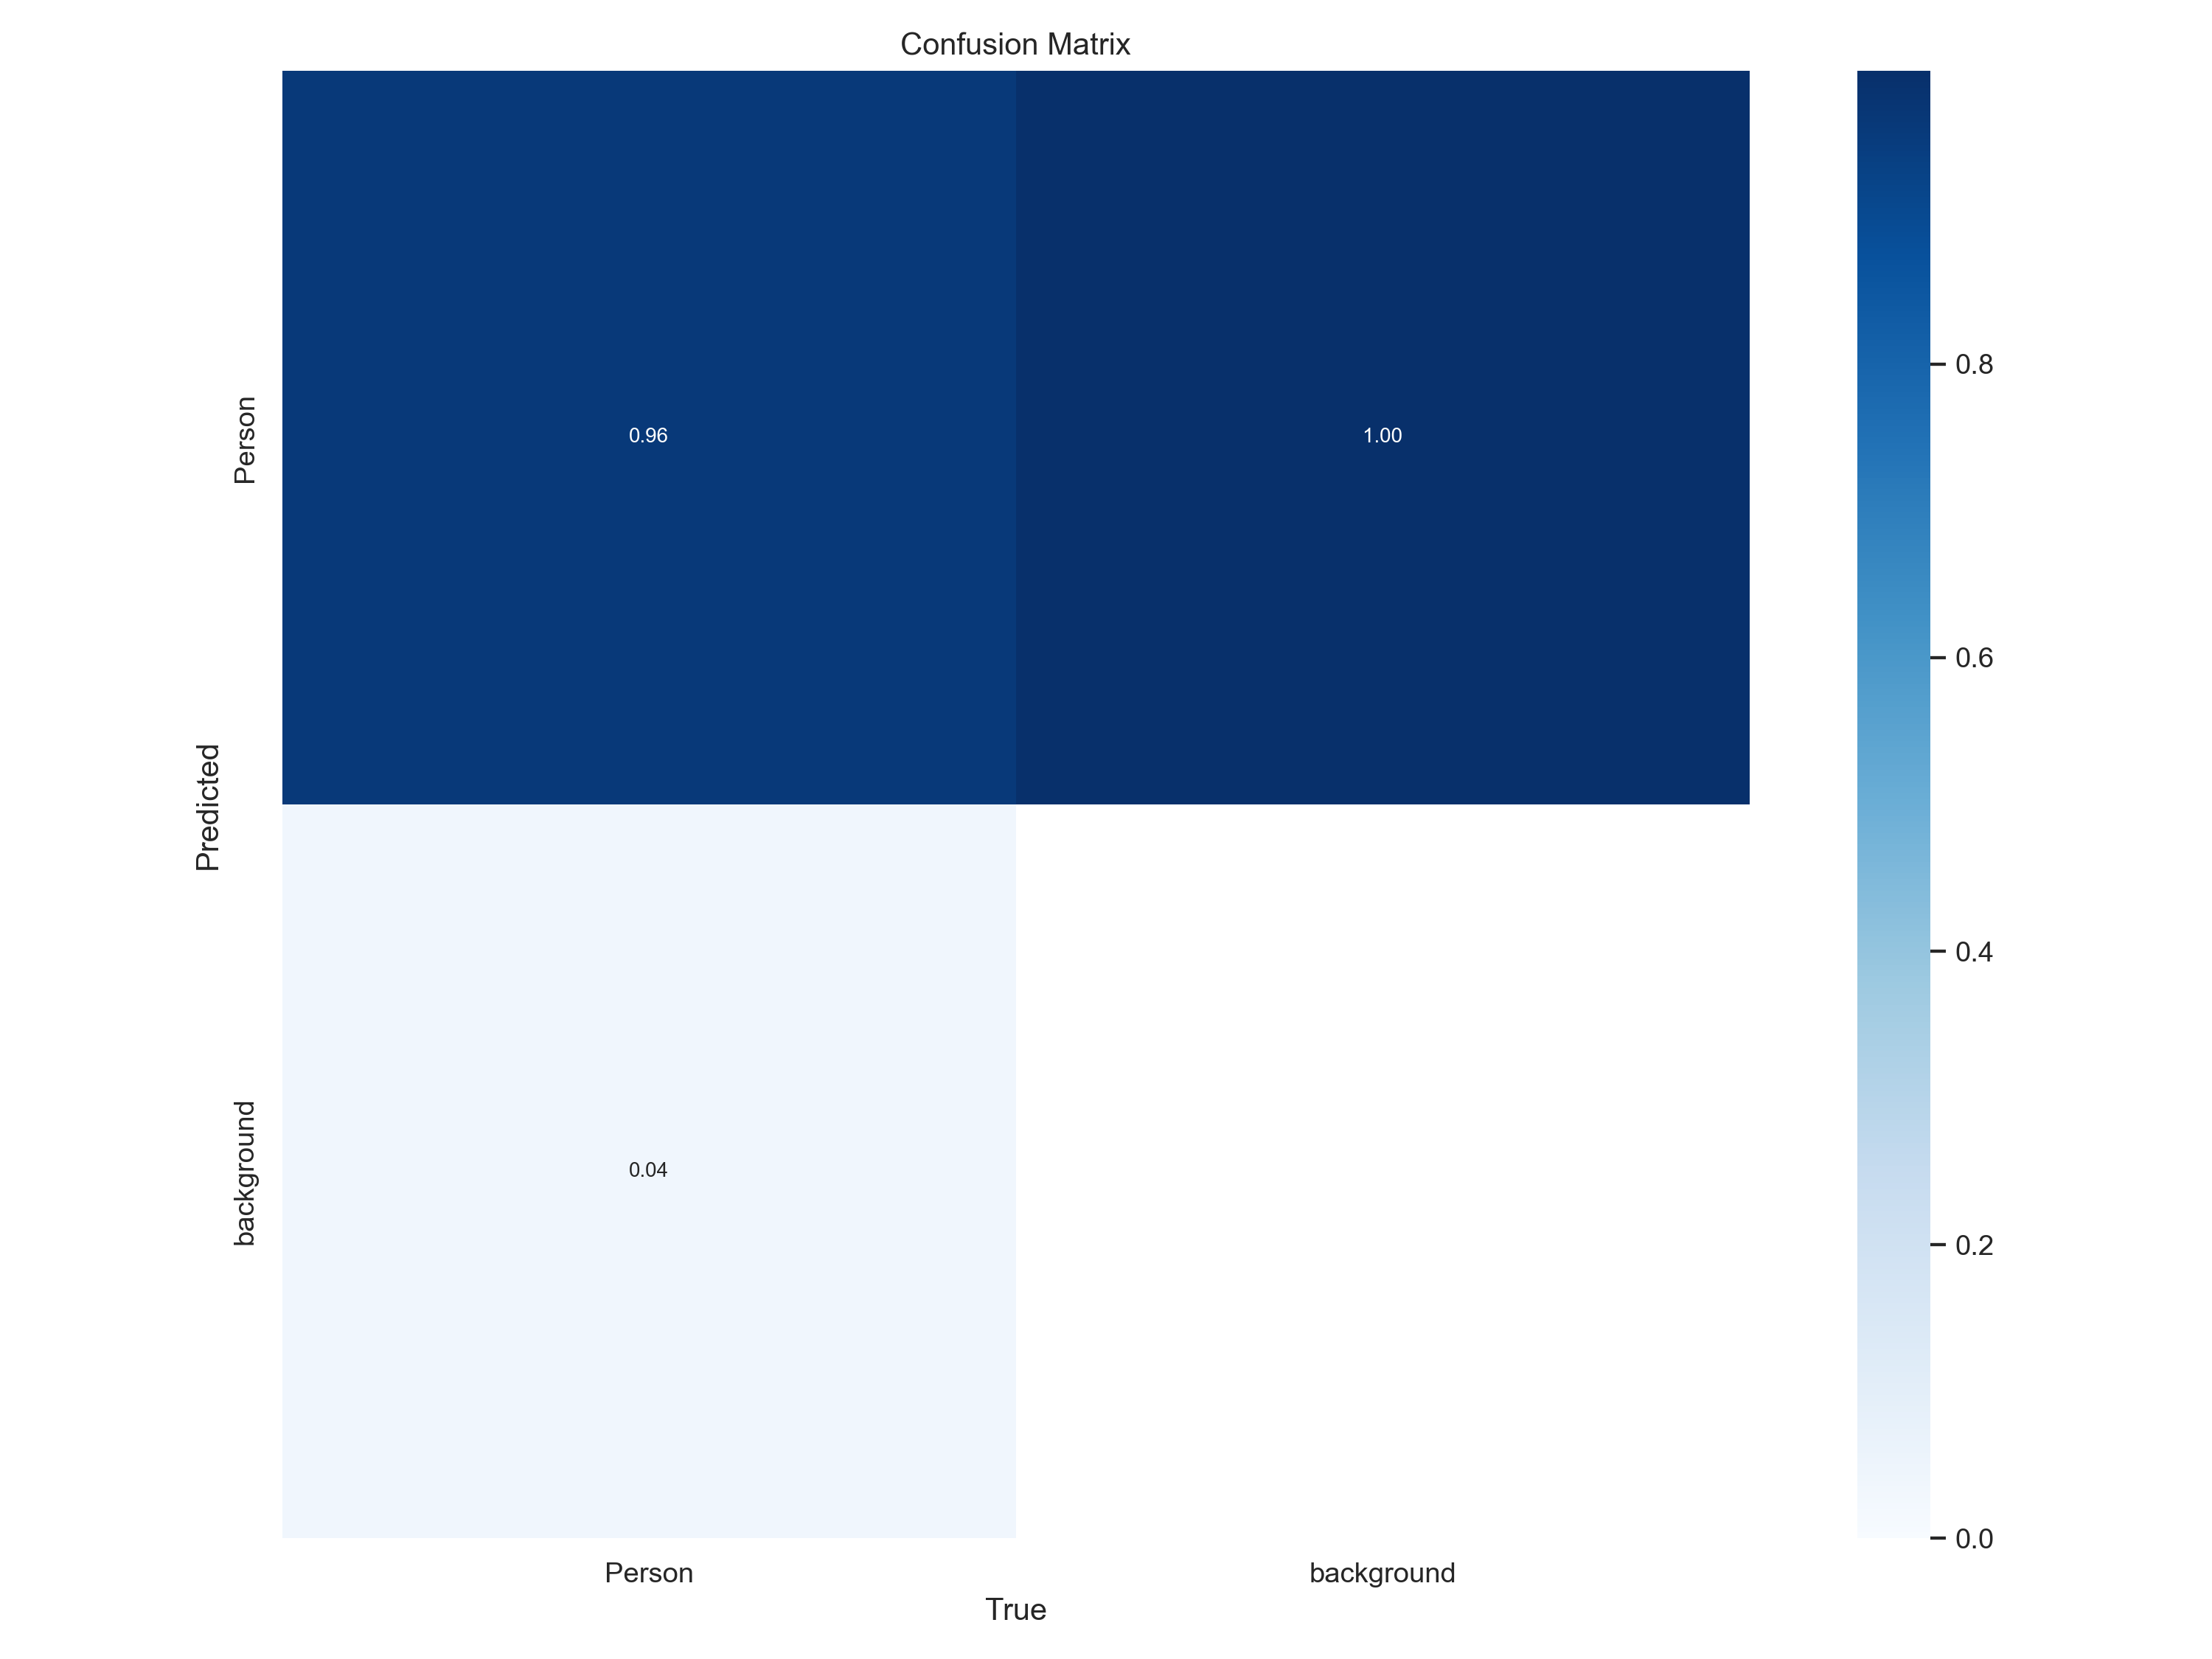

In [13]:
Image(filename='runs/detect/train/confusion_matrix.png', width=600)

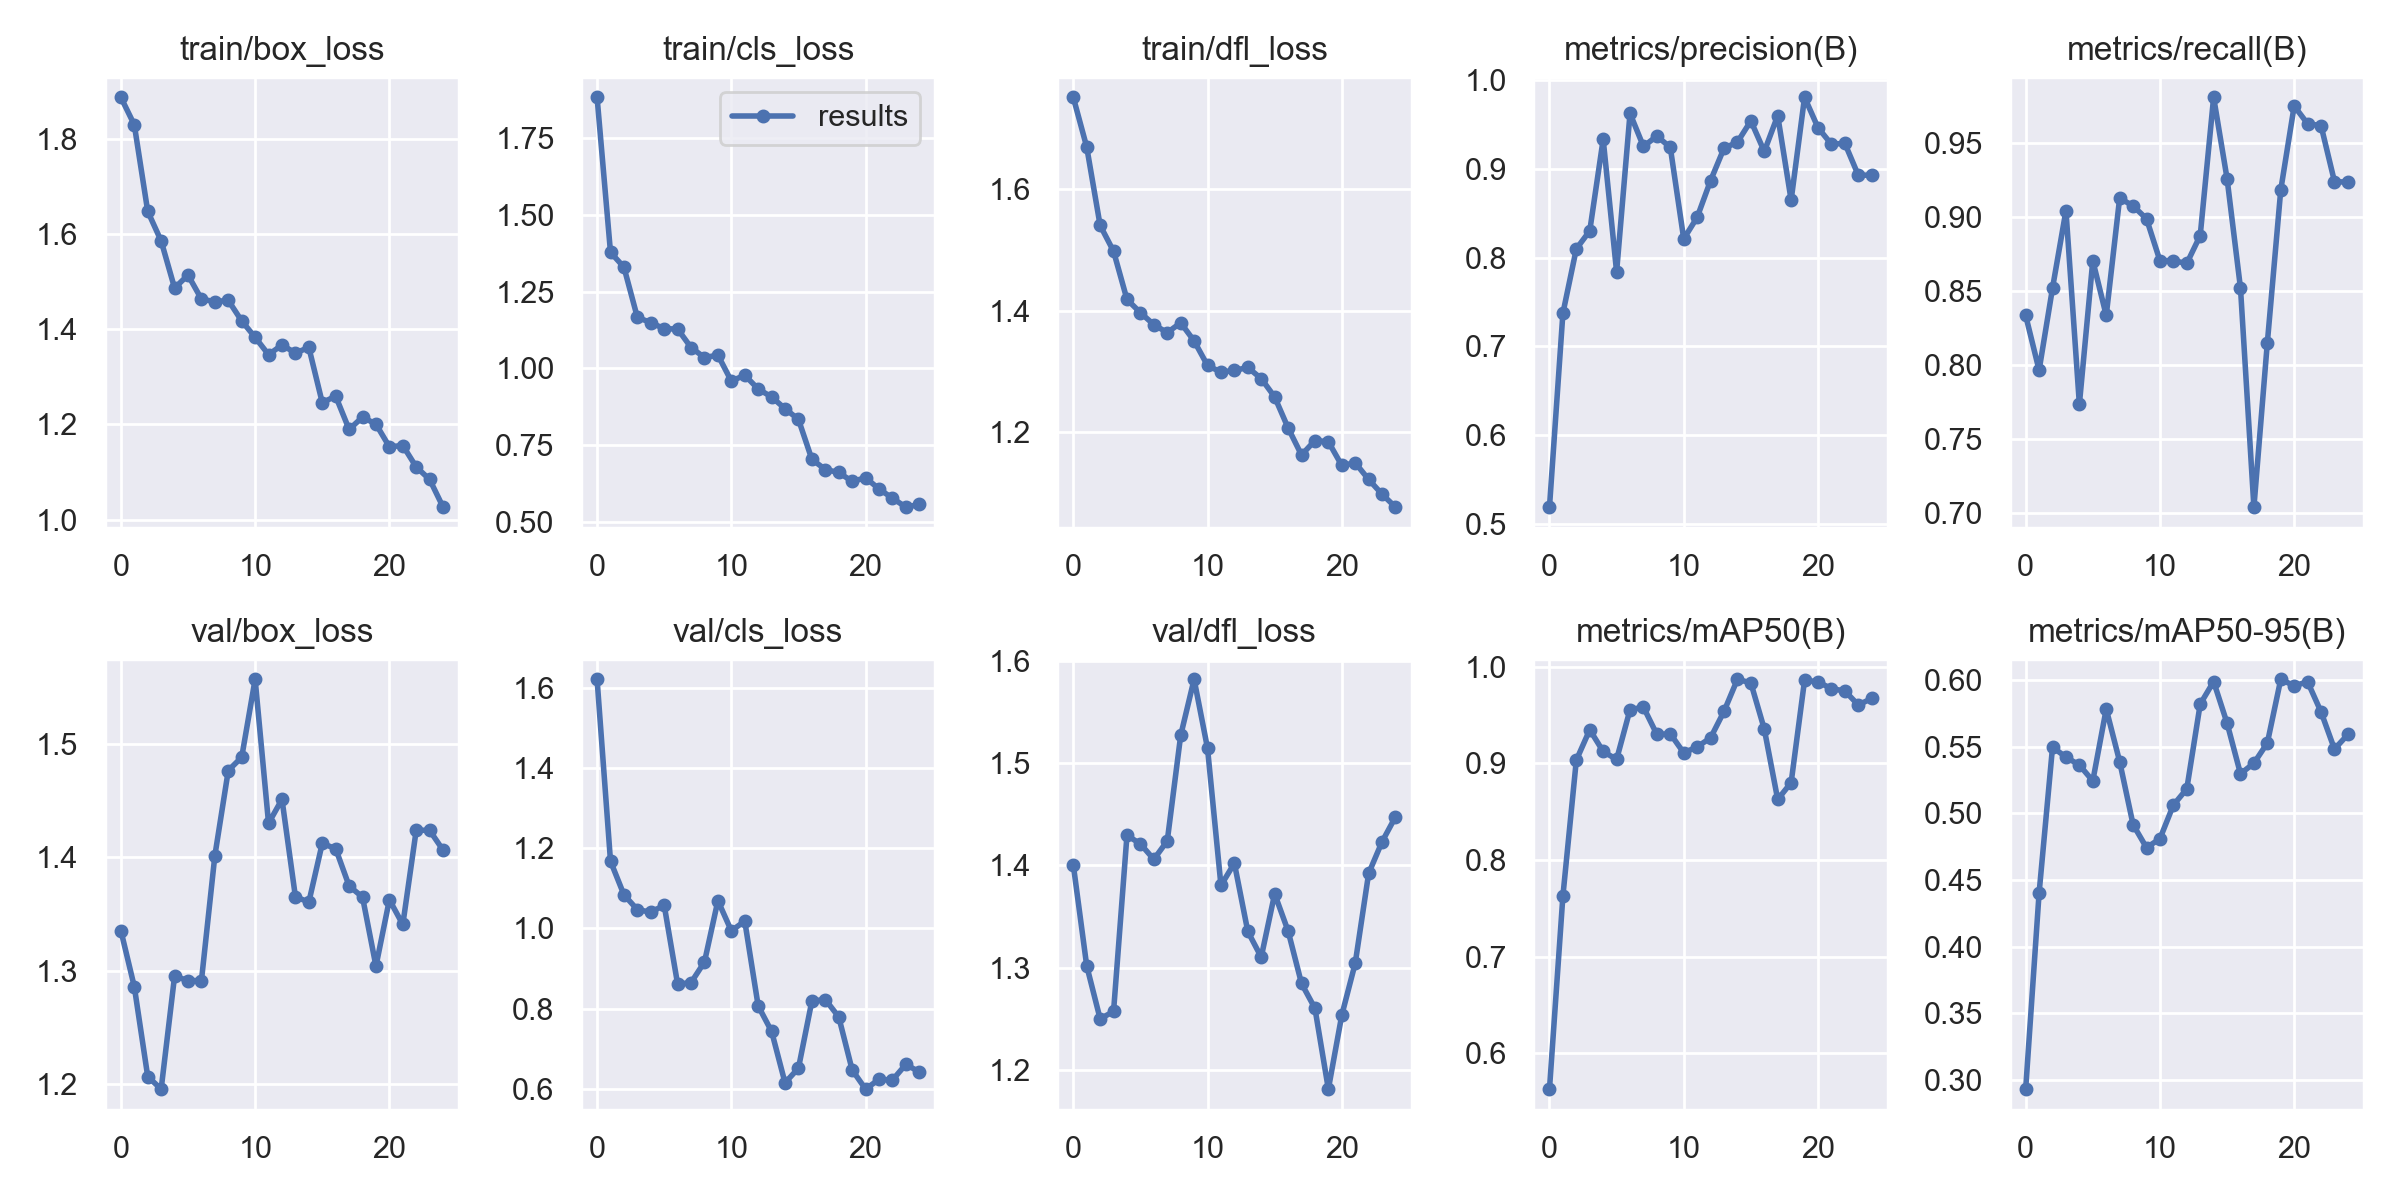

In [14]:
Image(filename='runs/detect/train/results.png', width=600)

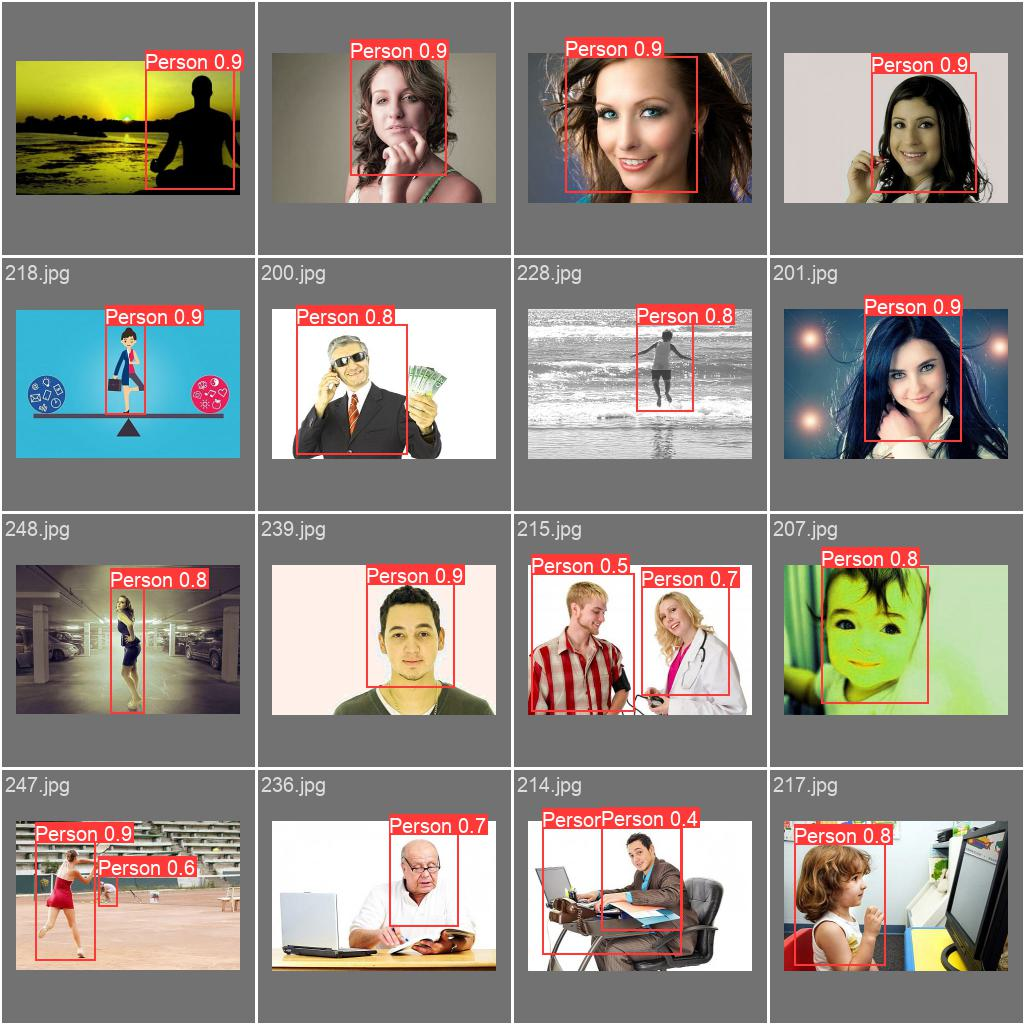

In [15]:
Image(filename='runs/detect/train/val_batch0_pred.jpg', width=600)

## Validating Custom Model

In [21]:
!yolo task=detect mode=val model=runs/detect/train/weights/best.pt data=data.yaml

Ultralytics YOLOv8.0.20  Python-3.9.13 torch-2.1.0+cpu CPU
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

val: Scanning C:\Users\Jaseem Shaikh\Downloads\HappyAI project 1\Project\val\labels.cache... 51 images, 0 backgrounds, 0 corrupt: 100%|##########| 51/51 [00:00<?, ?it/s]
val: Scanning C:\Users\Jaseem Shaikh\Downloads\HappyAI project 1\Project\val\labels.cache... 51 images, 0 backgrounds, 0 corrupt: 100%|##########| 51/51 [00:00<?, ?it/s]

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/4 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  25%|##5       | 1/4 [00:00<00:02,  1.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  50%|#####     | 2/4 [00:01<00:01,  1.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  75%|#######5  | 3/4 [00:02<

## Inference with Custom Model on images

In [36]:
!yolo task=detect mode=predict model= runs/detect/train/weights/best.pt conf=0.25 source= 251.jpg

Ultralytics YOLOv8.0.20  Python-3.9.13 torch-2.1.0+cpu CPU
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs
image 1/1 C:\Users\Jaseem Shaikh\Downloads\HappyAI project 1\Project\251.jpg: 224x192 2 Persons, 38.2ms
Speed: 0.0ms pre-process, 38.2ms inference, 0.0ms postprocess per image at shape (1, 3, 224, 224)


## Inference with Custom Model on Video

In [42]:
!yolo task=detect mode=predict model= runs/detect/train/weights/best.pt conf=0.25 source= vid1.mp4 save = True

Ultralytics YOLOv8.0.20  Python-3.9.13 torch-2.1.0+cpu CPU
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs
video 1/1 (1/188) C:\Users\Jaseem Shaikh\Downloads\HappyAI project 1\Project\vid1.mp4: 128x224 4 Persons, 62.4ms
video 1/1 (2/188) C:\Users\Jaseem Shaikh\Downloads\HappyAI project 1\Project\vid1.mp4: 128x224 3 Persons, 38.8ms
video 1/1 (3/188) C:\Users\Jaseem Shaikh\Downloads\HappyAI project 1\Project\vid1.mp4: 128x224 3 Persons, 37.4ms
video 1/1 (4/188) C:\Users\Jaseem Shaikh\Downloads\HappyAI project 1\Project\vid1.mp4: 128x224 4 Persons, 40.0ms
video 1/1 (5/188) C:\Users\Jaseem Shaikh\Downloads\HappyAI project 1\Project\vid1.mp4: 128x224 4 Persons, 37.6ms
video 1/1 (6/188) C:\Users\Jaseem Shaikh\Downloads\HappyAI project 1\Project\vid1.mp4: 128x224 4 Persons, 33.7ms
video 1/1 (7/188) C:\Users\Jaseem Shaikh\Downloads\HappyAI project 1\Project\vid1.mp4: 128x224 4 Persons, 37.0ms
video 1/1 (8/188) C:\Users\Jaseem Shaikh\Downloads\HappyAI project 1\

In [43]:
!yolo task=detect mode=predict model= runs/detect/train/weights/best.pt conf=0.25 source= vid2.mp4 save = True

Ultralytics YOLOv8.0.20  Python-3.9.13 torch-2.1.0+cpu CPU
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs
video 1/1 (1/229) C:\Users\Jaseem Shaikh\Downloads\HappyAI project 1\Project\vid2.mp4: 128x224 1 Person, 47.6ms
video 1/1 (2/229) C:\Users\Jaseem Shaikh\Downloads\HappyAI project 1\Project\vid2.mp4: 128x224 1 Person, 43.0ms
video 1/1 (3/229) C:\Users\Jaseem Shaikh\Downloads\HappyAI project 1\Project\vid2.mp4: 128x224 2 Persons, 47.2ms
video 1/1 (4/229) C:\Users\Jaseem Shaikh\Downloads\HappyAI project 1\Project\vid2.mp4: 128x224 3 Persons, 31.9ms
video 1/1 (5/229) C:\Users\Jaseem Shaikh\Downloads\HappyAI project 1\Project\vid2.mp4: 128x224 2 Persons, 31.6ms
video 1/1 (6/229) C:\Users\Jaseem Shaikh\Downloads\HappyAI project 1\Project\vid2.mp4: 128x224 1 Person, 31.5ms
video 1/1 (7/229) C:\Users\Jaseem Shaikh\Downloads\HappyAI project 1\Project\vid2.mp4: 128x224 2 Persons, 31.6ms
video 1/1 (8/229) C:\Users\Jaseem Shaikh\Downloads\HappyAI project 1\Pro

In [44]:
!yolo task=detect mode=predict model= runs/detect/train/weights/best.pt conf=0.25 source= vid3.mp4 save = True

Ultralytics YOLOv8.0.20  Python-3.9.13 torch-2.1.0+cpu CPU
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs
video 1/1 (1/621) C:\Users\Jaseem Shaikh\Downloads\HappyAI project 1\Project\vid3.mp4: 128x224 47.8ms
video 1/1 (2/621) C:\Users\Jaseem Shaikh\Downloads\HappyAI project 1\Project\vid3.mp4: 128x224 31.8ms
video 1/1 (3/621) C:\Users\Jaseem Shaikh\Downloads\HappyAI project 1\Project\vid3.mp4: 128x224 47.1ms
video 1/1 (4/621) C:\Users\Jaseem Shaikh\Downloads\HappyAI project 1\Project\vid3.mp4: 128x224 1 Person, 31.2ms
video 1/1 (5/621) C:\Users\Jaseem Shaikh\Downloads\HappyAI project 1\Project\vid3.mp4: 128x224 1 Person, 31.6ms
video 1/1 (6/621) C:\Users\Jaseem Shaikh\Downloads\HappyAI project 1\Project\vid3.mp4: 128x224 2 Persons, 31.8ms
video 1/1 (7/621) C:\Users\Jaseem Shaikh\Downloads\HappyAI project 1\Project\vid3.mp4: 128x224 2 Persons, 43.9ms
video 1/1 (8/621) C:\Users\Jaseem Shaikh\Downloads\HappyAI project 1\Project\vid3.mp4: 128x224 3 Persons

In [16]:
!yolo task=detect mode=predict model= runs/detect/train/weights/best.pt conf=0.25 source= vid4.mp4 save = True

Ultralytics YOLOv8.0.20  Python-3.9.13 torch-2.1.0+cpu CPU
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs
video 1/1 (1/264) C:\Users\Jaseem Shaikh\Downloads\HappyAI project 1\Project\vid4.mp4: 128x224 4 Persons, 47.5ms
video 1/1 (2/264) C:\Users\Jaseem Shaikh\Downloads\HappyAI project 1\Project\vid4.mp4: 128x224 3 Persons, 31.4ms
video 1/1 (3/264) C:\Users\Jaseem Shaikh\Downloads\HappyAI project 1\Project\vid4.mp4: 128x224 2 Persons, 29.2ms
video 1/1 (4/264) C:\Users\Jaseem Shaikh\Downloads\HappyAI project 1\Project\vid4.mp4: 128x224 3 Persons, 31.5ms
video 1/1 (5/264) C:\Users\Jaseem Shaikh\Downloads\HappyAI project 1\Project\vid4.mp4: 128x224 2 Persons, 24.2ms
video 1/1 (6/264) C:\Users\Jaseem Shaikh\Downloads\HappyAI project 1\Project\vid4.mp4: 128x224 4 Persons, 471.8ms
video 1/1 (7/264) C:\Users\Jaseem Shaikh\Downloads\HappyAI project 1\Project\vid4.mp4: 128x224 1 Person, 1140.2ms
video 1/1 (8/264) C:\Users\Jaseem Shaikh\Downloads\HappyAI project 